In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

In [ ]:
#Reading the file
df1 = pd.read_csv("/content/train-chennai-sale.csv")
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df1.loc[3]

PRT_ID               P05346
AREA              Velachery
INT_SQFT               1855
DATE_SALE        13-03-2010
DIST_MAINROAD            14
N_BEDROOM               3.0
N_BATHROOM              2.0
N_ROOM                    5
SALE_COND            Family
PARK_FACIL               No
DATE_BUILD       18-03-1988
BUILDTYPE            Others
UTILITY_AVAIL       NoSewr 
STREET                Paved
MZZONE                    I
QS_ROOMS                4.7
QS_BATHROOM             3.9
QS_BEDROOM              3.6
QS_OVERALL             4.01
REG_FEE              356321
COMMIS                77042
SALES_PRICE         9630290
Name: 3, dtype: object

### Dropping PRT_ID column since it does not help in prediction.

In [ ]:
#Dropping PRT_ID Column
df2 = df1.drop('PRT_ID', axis=1)

In [ ]:
#Displaying the first 5 rows
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
#Shape of the data
df2.shape

(7109, 21)

In [ ]:
#Columns
df2.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

# DATA CLEANING

In [ ]:
#Basic information about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FEE 

In [ ]:
#Displaying null values
df2.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### Data consists of 54 null values in total out of 7109 records. Since null value percentage is less than 3%, we can remove them.

In [ ]:
#Copying to another dataframe
df3 = df2.copy()

In [ ]:
#Dropping all null values
df3 = df2.dropna()

In [ ]:
#No null values present
df3.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df3['BUILDTYPE']

0       Commercial
1       Commercial
2       Commercial
3           Others
4           Others
           ...    
7104        Others
7105        Others
7106         House
7107    Commercial
7108        Others
Name: BUILDTYPE, Length: 7056, dtype: object

In [ ]:
#Converting to date datatype 
df3['DATE_SALE'] = pd.to_datetime(df3['DATE_SALE'])
df3['DATE_BUILD'] = pd.to_datetime(df3['DATE_BUILD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7056 non-null   object        
 1   INT_SQFT       7056 non-null   int64         
 2   DATE_SALE      7056 non-null   datetime64[ns]
 3   DIST_MAINROAD  7056 non-null   int64         
 4   N_BEDROOM      7056 non-null   float64       
 5   N_BATHROOM     7056 non-null   float64       
 6   N_ROOM         7056 non-null   int64         
 7   SALE_COND      7056 non-null   object        
 8   PARK_FACIL     7056 non-null   object        
 9   DATE_BUILD     7056 non-null   datetime64[ns]
 10  BUILDTYPE      7056 non-null   object        
 11  UTILITY_AVAIL  7056 non-null   object        
 12  STREET         7056 non-null   object        
 13  MZZONE         7056 non-null   object        
 14  QS_ROOMS       7056 non-null   float64       
 15  QS_BATHROOM    7056 n

In [ ]:
#Extracting number of days from the dates.
df3['AGE_DAYS'] = df3['DATE_SALE'] - df3['DATE_BUILD']
#df3['AGE_BUILDING_YEARS'] = \ (df3['AGE_BUILDING_DAYS'] / np.timedelta64(1,'Y')).astype('float').round(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.head(10)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_DAYS
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031 days
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015 days
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152 days
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030 days
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802 days
5,Chrompet,1220,2014-11-09,36,2.0,1.0,4,Partial,No,2009-12-09,...,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,1796 days
6,Chrompet,1167,2007-05-04,137,1.0,1.0,3,Partial,No,1979-12-04,...,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,10013 days
7,Velachery,1847,2006-03-13,176,3.0,2.0,5,Family,No,1996-03-15,...,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,3650 days
8,Chrompet,771,2011-06-04,175,1.0,1.0,2,AdjLand,No,1977-04-14,...,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970,12469 days
9,Velachery,1635,2006-06-22,74,2.0,1.0,4,AbNormal,No,1991-06-26,...,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650,5475 days


In [ ]:
#Function to extract number of days from the string
def age_extract(x):
  x = str(x)
  l = x.split()
  return l[0]

In [ ]:
#Converting days to years
df3['AGE_DAYS'] = df3['AGE_DAYS'].apply(age_extract)
df3['AGE_DAYS'] = df3['AGE_DAYS'].astype('int64')

df3['AGE_YEARS'] = (df3['AGE_DAYS'] * 0.0027379).astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Displaying the rows
df3.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_DAYS,AGE_YEARS
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031,43
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015,10
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152,19
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030,21
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802,29


In [ ]:
df4 = df3.copy()

Columns DATE_SALE, DATE_BUILD, AGE_DAYS are not required. Hence, we drop them

In [ ]:
#Dropping the columns
df4 = df4.drop(['DATE_SALE','DATE_BUILD','AGE_DAYS'], axis=1)

In [ ]:
df4.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_YEARS
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29


In [ ]:
df4.shape

(7056, 20)

In [ ]:
#Resetting the index
df4.reset_index(inplace=True)

In [ ]:
df5 = df4.copy()

In [ ]:
#Displaying area wise count
df4['AREA'].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In the area column, there are records with same areas with different names. Hence, we have to make all area names as 1 name.

In [ ]:
#Code for making all area names as one name

for i in range(0,len(df4['AREA'])):
  if df4['AREA'][i] == 'Chrompt' or df4['AREA'][i] == 'Chrmpet' or df4['AREA'][i] == 'Chormpet':
    df5['AREA'][i] = df5['AREA'][i].replace(df4['AREA'][i], 'Chrompet')

  elif df4['AREA'][i] == 'Karapakam':
    df5['AREA'][i] = df5['AREA'][i].replace(df4['AREA'][i], 'Karapakkam')

  elif df4['AREA'][i] == 'KKNagar':
    df5['AREA'][i] = df5['AREA'][i].replace(df4['AREA'][i], 'KK Nagar')

  elif df4['AREA'][i] == 'Velchery':
    df5['AREA'][i] = df5['AREA'][i].replace(df4['AREA'][i], 'Velachery')

  elif df4['AREA'][i] == 'Ana Nagar' or df4['AREA'][i] == 'Ann Nagar':
    df5['AREA'][i] = df5['AREA'][i].replace(df4['AREA'][i], 'Anna Nagar')

  elif df4['AREA'][i] == 'Adyr':
    df5['AREA'][i] = df5['AREA'][i].replace(df4['AREA'][i], 'Adyar')

  elif df4['AREA'][i] == 'TNagar':
    df5['AREA'][i] = df5['AREA'][i].replace(df4['AREA'][i], 'T Nagar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is tryi

All area names are grouped as one area name for each area.

In [ ]:
df5['AREA'].value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

Similarly, columns SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET are having different names which mean the same type.

In [ ]:
df4['SALE_COND'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
#Code to create single name for different names

for i in range(0,len(df4['SALE_COND'])):
  if df4['SALE_COND'][i] == 'Adj Land':
    df5['SALE_COND'][i] = df5['SALE_COND'][i].replace(df4['SALE_COND'][i], 'AdjLand')

  elif df4['SALE_COND'][i] == 'Ab Normal':
    df5['SALE_COND'][i] = df5['SALE_COND'][i].replace(df4['SALE_COND'][i], 'AbNormal')

  elif df4['SALE_COND'][i] == 'Partiall' or df4['SALE_COND'][i] == 'PartiaLl':
    df5['SALE_COND'][i] = df5['SALE_COND'][i].replace(df4['SALE_COND'][i], 'Partial')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df5['SALE_COND'].value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

In [ ]:
df4['PARK_FACIL'].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [ ]:
#Code to create single name for different names

for i in range(0,len(df4['PARK_FACIL'])):
  if df4['PARK_FACIL'][i] == 'Noo':
    df5['PARK_FACIL'][i] = df5['PARK_FACIL'][i].replace(df4['PARK_FACIL'][i], 'No')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df5['PARK_FACIL'].value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

In [ ]:
df4['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
#Code to create single name for different names

for i in range(0,len(df4['BUILDTYPE'])):
  if df4['BUILDTYPE'][i] == 'Other':
    df5['BUILDTYPE'][i] = df5['BUILDTYPE'][i].replace(df4['BUILDTYPE'][i], 'Others')
  elif df4['BUILDTYPE'][i] == 'Comercial':
    df5['BUILDTYPE'][i] = df5['BUILDTYPE'][i].replace(df4['BUILDTYPE'][i], 'Commercial')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df5['BUILDTYPE'].value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

In [ ]:
df4['UTILITY_AVAIL'].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
#Code to create single name for different names

for i in range(0,len(df4['UTILITY_AVAIL'])):
  if df4['UTILITY_AVAIL'][i] == 'All Pub':
    df5['UTILITY_AVAIL'][i] = df5['UTILITY_AVAIL'][i].replace(df4['UTILITY_AVAIL'][i], 'AllPub')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df5['UTILITY_AVAIL'].value_counts()

AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
df4['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
#Code to create single name for different names

for i in range(0,len(df4['STREET'])):
  if df4['STREET'][i] == 'Pavd':
    df5['STREET'][i] = df5['STREET'][i].replace(df4['STREET'][i], 'Paved')
  if df4['STREET'][i] == 'NoAccess':
    df5['STREET'][i] = df5['STREET'][i].replace(df4['STREET'][i], 'No Access')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df5['STREET'].value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

In [ ]:
df4['MZZONE'].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [ ]:
df5.head(10)

,index,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_YEARS
0,0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29
5,5,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,...,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,4
6,6,Chrompet,1167,137,1.0,1.0,3,Partial,No,Others,...,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,27
7,7,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,...,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,9
8,8,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,...,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970,34
9,9,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,...,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650,14


In [ ]:
#Dropping index column

df5.drop('index', axis=1, inplace=True)

In [ ]:
df5.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_YEARS
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29


Checking for any outlier in the numerical columns

In [ ]:
df5['QS_BATHROOM'].unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [ ]:
df5['QS_ROOMS'].unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.8, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [ ]:
df5['QS_BEDROOM'].unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [ ]:
df5['QS_OVERALL'].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 , 3.57 , 4.3  , 3.35 ,
       4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 , 4.18 ,
       2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 , 3.12 ,
       3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 , 4.07 ,
       3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 , 3.985,
       3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395, 3.14 ,
       2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735, 2.62 ,
       4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 , 2.9  ,
       3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 , 2.475,
       2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 , 3.1  ,
       2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 , 3.56 ,
       4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 , 2.96 ,
       3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 , 3.86 ,
       3.62 , 4.5  ,

In [ ]:
df5['REG_FEE'].unique()

array([380000, 760122, 421094, ..., 317354, 425350, 349177])

In [ ]:
df5['COMMIS'].unique()

array([144400, 304049,  92114, ..., 167028, 119098,  79812])

In [ ]:
df5['SALES_PRICE'].unique()

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [ ]:
#Statistics of the new cleaned data

df5.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7056.0,1.381317e+03,4.578609e+02,500.0,991.00,1369.5,1744.00,2500.00
DIST_MAINROAD,7056.0,9.956916e+01,5.740387e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7056.0,1.636621e+00,8.036325e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7056.0,1.213152e+00,4.095631e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7056.0,3.686650e+00,1.020011e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7056.0,3.517177e+00,8.921405e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7056.0,3.505896e+00,8.976443e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7056.0,3.485332e+00,8.868143e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7056.0,3.503389e+00,5.273126e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7056.0,3.767919e+05,1.431096e+05,71177.0,272117.50,349444.5,451030.50,983922.00


For house price prediction, we need a feature that tells us the price per sqft as it helps in determining the price for every area for 1 sqft.

In [ ]:
df6 = df5.copy()

In [ ]:
#Creating a new feature to calculate price per sqft

df6['price_per_sqft'] = df5['SALES_PRICE']/df5['INT_SQFT']
df6.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_YEARS,price_per_sqft
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43,7569.721116
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10,10935.433031
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19,14476.567657
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21,5191.530997
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29,6040.986949


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AREA            7056 non-null   object 
 1   INT_SQFT        7056 non-null   int64  
 2   DIST_MAINROAD   7056 non-null   int64  
 3   N_BEDROOM       7056 non-null   float64
 4   N_BATHROOM      7056 non-null   float64
 5   N_ROOM          7056 non-null   int64  
 6   SALE_COND       7056 non-null   object 
 7   PARK_FACIL      7056 non-null   object 
 8   BUILDTYPE       7056 non-null   object 
 9   UTILITY_AVAIL   7056 non-null   object 
 10  STREET          7056 non-null   object 
 11  MZZONE          7056 non-null   object 
 12  QS_ROOMS        7056 non-null   float64
 13  QS_BATHROOM     7056 non-null   float64
 14  QS_BEDROOM      7056 non-null   float64
 15  QS_OVERALL      7056 non-null   float64
 16  REG_FEE         7056 non-null   int64  
 17  COMMIS          7056 non-null   i

In [ ]:
#Converting N_BATHROOM and N_BEDROOM features to integer

df6['N_BEDROOM'] = df6['N_BEDROOM'].astype('int64')
df6['N_BATHROOM'] = df6['N_BATHROOM'].astype('int64')

In [ ]:
#Statistics about price per sqft column

df6['price_per_sqft'].describe().T

count     7056.000000
mean      8245.223564
std       2459.162150
min       2983.242134
25%       6380.135592
50%       7923.932387
75%       9823.141898
max      18543.860759
Name: price_per_sqft, dtype: float64

As we can see, the min and max values for price per sqft column are 2,983.24 & 18,543.86 respectively. 

We can use the standard deviation method to remove outliers
I have used (Mean - 3 * Standard Deviation) & (Mean + 3 * Standard Deviation) method to remove outliers.

In [ ]:
#Function to remove the outliers

def remove(df_in):
  df_final = pd.DataFrame()
  for i,j in df_in.groupby('AREA'):
    M = j['price_per_sqft'].mean()
    STD = np.std(j['price_per_sqft'])
    cleaned = j[(j['price_per_sqft'] > (M-3*STD)) & (j['price_per_sqft'] <= (M+3*STD))]
    df_final = pd.concat([df_final,cleaned],ignore_index=True)
  
  return df_final

In [ ]:
#Function call
#df7 has records that has no outliers

df7 = remove(df6)
df7.shape

(7043, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


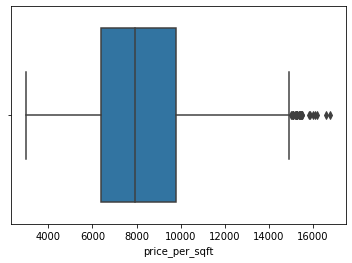

In [ ]:
sns.boxplot(df7['price_per_sqft'])

In [ ]:
#Displaying newly cleaned data with no outliers

df7.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_YEARS,price_per_sqft
0,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,...,RL,4.1,3.8,2.2,3.09,421094,92114,13159200,19,14476.567657
1,Adyar,1056,83,1,1,3,Partial,Yes,Others,NoSewr,...,RH,2.2,3.4,3.7,3.19,319141,37546,9386490,25,8888.721591
2,Adyar,1136,69,1,1,3,Normal Sale,Yes,Others,AllPub,...,A,4.6,2.6,2.9,3.35,323214,49725,8287550,30,7295.378521
3,Adyar,1130,29,1,1,3,Family,Yes,Commercial,ELO,...,RH,2.3,2.5,2.2,2.29,468417,53533,13383350,29,11843.672566
4,Adyar,730,185,1,1,2,AdjLand,Yes,House,ELO,...,RL,2.7,4.6,4.9,4.18,265449,53090,8848285,38,12120.938356


We need to check if any feature is dependent on any other feature except the target variable.

For this we use heatmap to check for correlation.

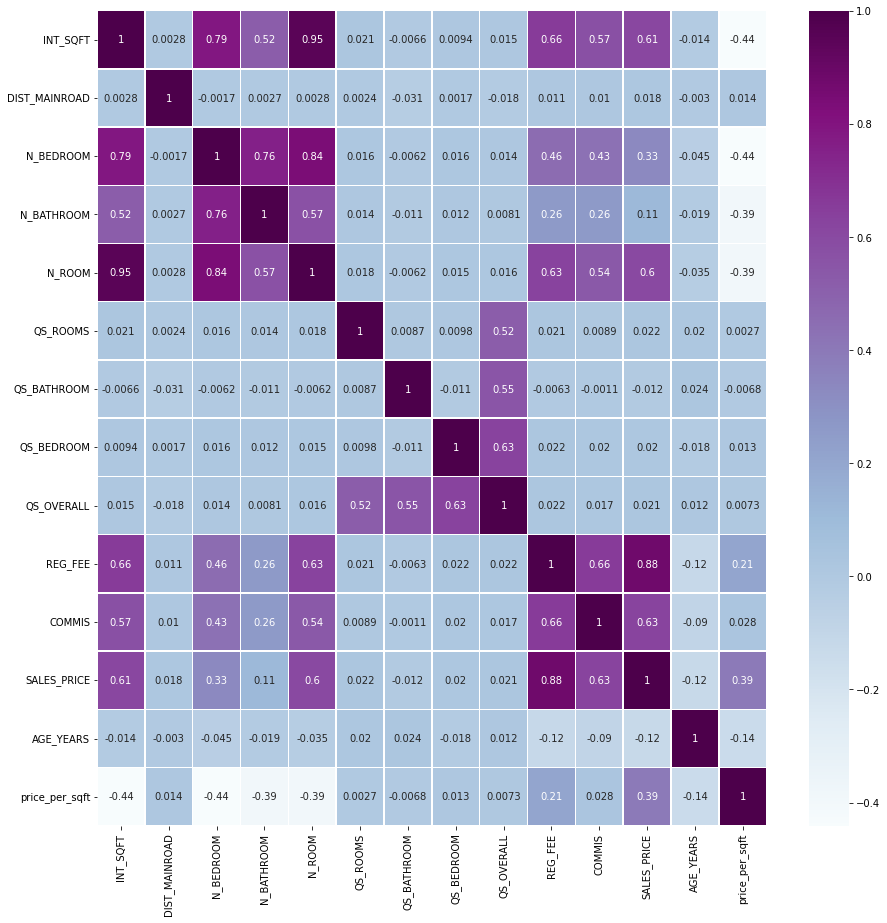

In [ ]:
#Checking for correlation using heatmap

plt.figure(figsize=(15,15))
sns.heatmap(df7.corr(), annot=True, linewidths=0.5, cmap='BuPu')
plt.show()

As we can see, N_ROOM has high correlation with INT_SQFT column. To decide which column to remove, INT_SQFT contributes more towards the target variable compared to N_ROOM column. Therefore, we drop the N_ROOM feature.

In [ ]:
#Copying the dataframe

df8 = df7.copy()

In [ ]:
#Dropping N_ROOM feature

df8.drop('N_ROOM', axis=1, inplace=True)

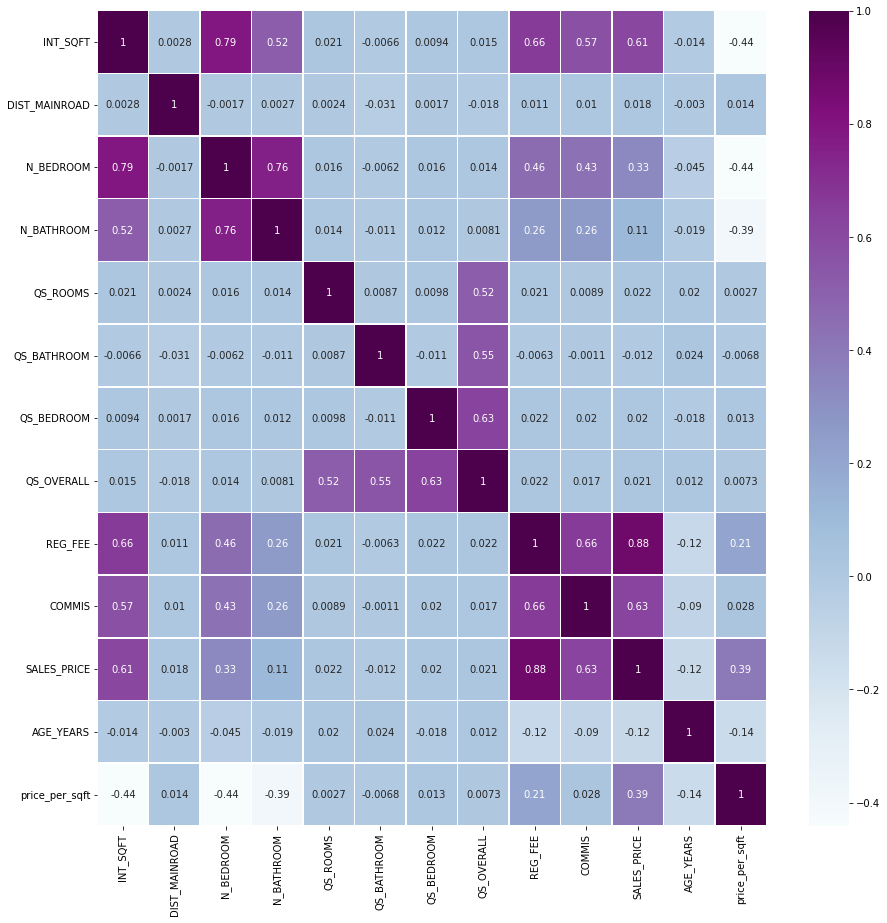

In [ ]:
#Checking for correlation

plt.figure(figsize=(15,15))
sns.heatmap(df8.corr(), annot=True, linewidths=0.5, cmap='BuPu')
plt.show()

In [ ]:
df8.shape

(7043, 20)

In [ ]:
df8.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_YEARS,price_per_sqft
0,Adyar,909,70,1,1,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200,19,14476.567657
1,Adyar,1056,83,1,1,Partial,Yes,Others,NoSewr,Paved,RH,2.2,3.4,3.7,3.19,319141,37546,9386490,25,8888.721591
2,Adyar,1136,69,1,1,Normal Sale,Yes,Others,AllPub,Paved,A,4.6,2.6,2.9,3.35,323214,49725,8287550,30,7295.378521
3,Adyar,1130,29,1,1,Family,Yes,Commercial,ELO,Paved,RH,2.3,2.5,2.2,2.29,468417,53533,13383350,29,11843.672566
4,Adyar,730,185,1,1,AdjLand,Yes,House,ELO,Gravel,RL,2.7,4.6,4.9,4.18,265449,53090,8848285,38,12120.938356


# DATA VISUALIZATIONS

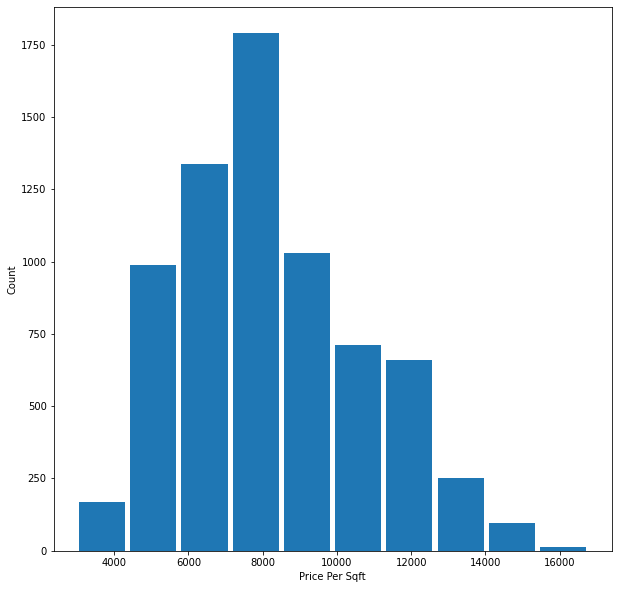

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df8['price_per_sqft'], rwidth=0.9)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


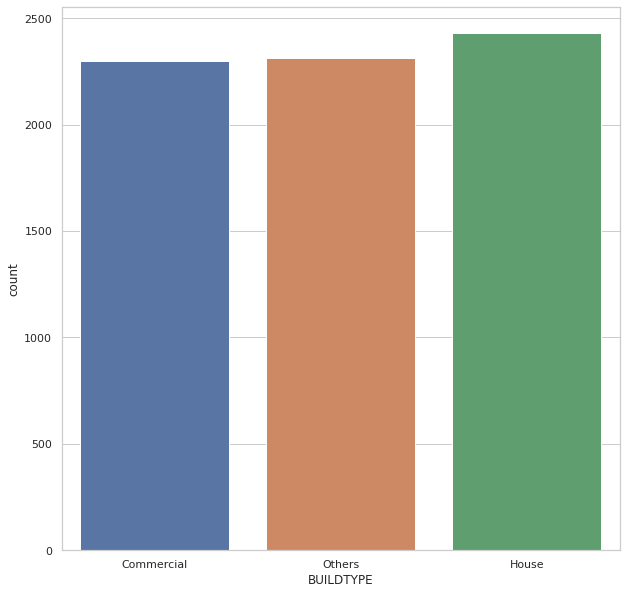

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
sns.countplot(df8['BUILDTYPE'])

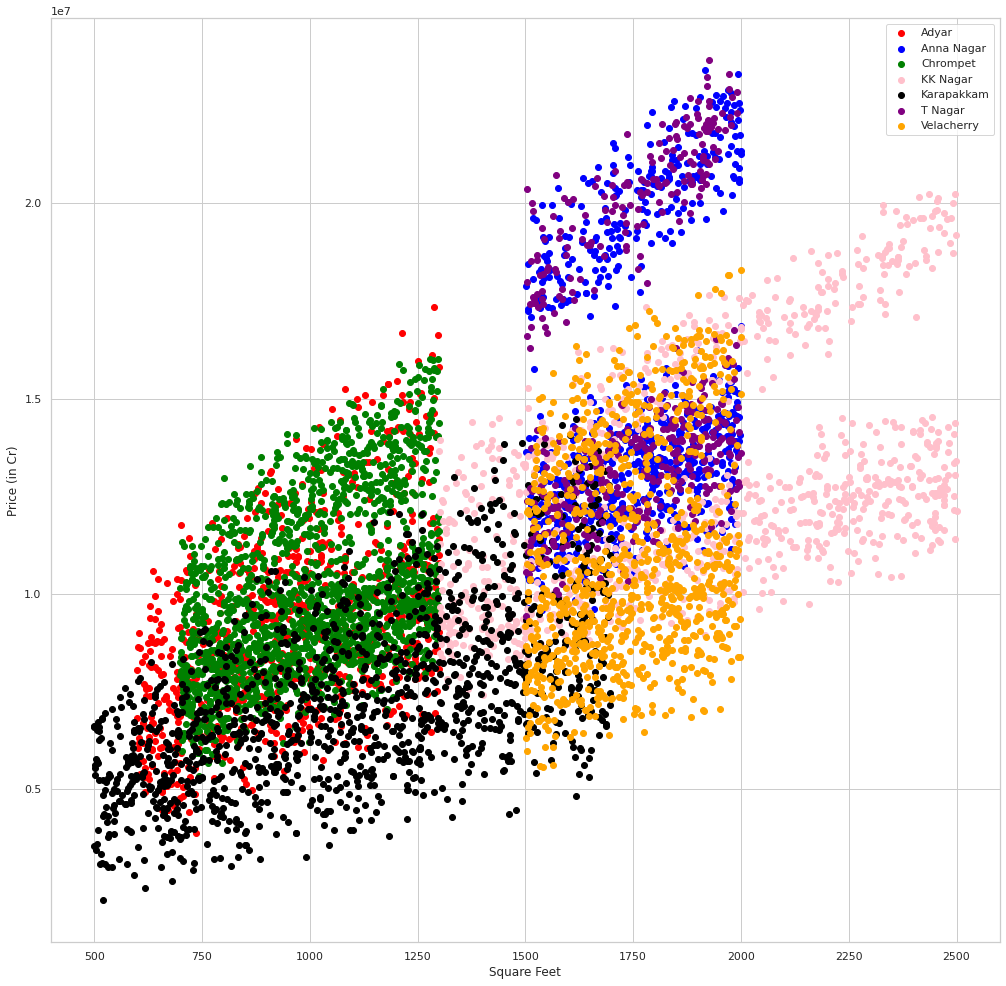

In [ ]:
a1 = df8[df8['AREA']==df8['AREA'].unique()[0]]
a2 = df8[df8['AREA']==df8['AREA'].unique()[1]]
a3 = df8[df8['AREA']==df8['AREA'].unique()[2]]
a4 = df8[df8['AREA']==df8['AREA'].unique()[3]]
a5 = df8[df8['AREA']==df8['AREA'].unique()[4]]
a6 = df8[df8['AREA']==df8['AREA'].unique()[5]]
a7 = df8[df8['AREA']==df8['AREA'].unique()[6]]

plt.figure(figsize=(17,17))

plt.scatter(a1['INT_SQFT'], a1['SALES_PRICE'], color='red', label="Adyar")
plt.scatter(a2['INT_SQFT'], a2['SALES_PRICE'], color='blue',label="Anna Nagar")
plt.scatter(a3['INT_SQFT'], a3['SALES_PRICE'], color='green', label="Chrompet")
plt.scatter(a4['INT_SQFT'], a4['SALES_PRICE'], color='pink', label="KK Nagar")
plt.scatter(a5['INT_SQFT'], a5['SALES_PRICE'], color='black', label="Karapakkam")
plt.scatter(a6['INT_SQFT'], a6['SALES_PRICE'], color='purple', label="T Nagar")
plt.scatter(a7['INT_SQFT'], a7['SALES_PRICE'], color='orange', label="Velacherry")
plt.xlabel("Square Feet")
plt.ylabel("Price (in Cr)")
plt.legend()
plt.show()

In [ ]:
df8.groupby("AREA")["SALES_PRICE"].sum()

AREA
Adyar          7036336365
Anna Nagar    11788159060
Chrompet      16907306650
KK Nagar      12579896820
Karapakkam     9893331125
T Nagar        7731746740
Velachery     10771867590
Name: SALES_PRICE, dtype: int64

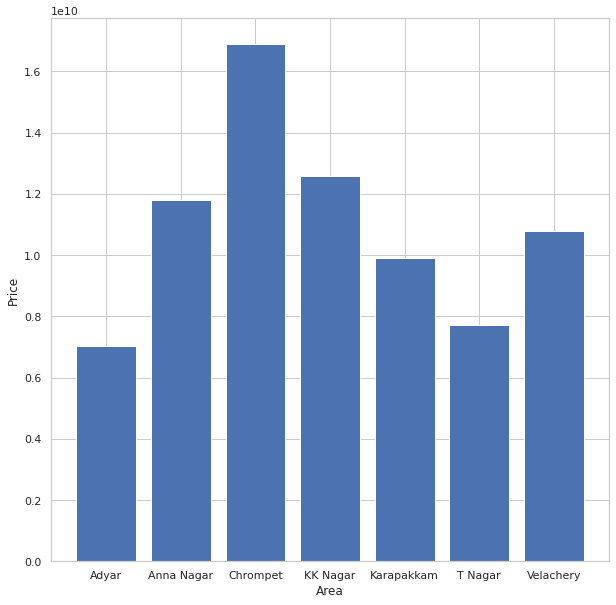

In [ ]:
price = df8.groupby("AREA")["SALES_PRICE"].sum()

plt.figure(figsize=(10,10))

plt.bar(df8['AREA'].unique(),price)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

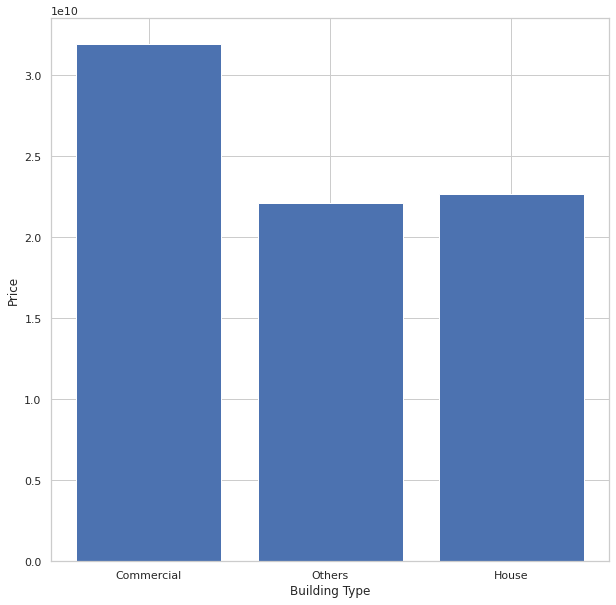

In [ ]:
build_price = df8.groupby("BUILDTYPE")["SALES_PRICE"].sum()

plt.figure(figsize=(10,10))

plt.bar(df8['BUILDTYPE'].unique(),build_price)
plt.xlabel("Building Type")
plt.ylabel("Price")
plt.show()

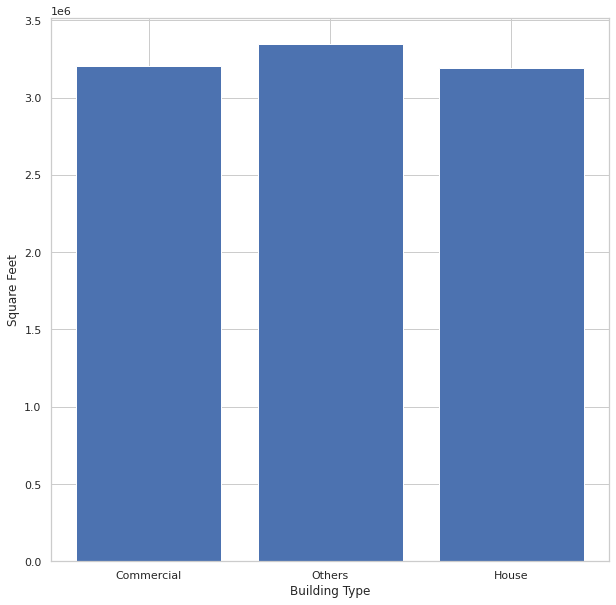

In [ ]:
build_sqft = df8.groupby("BUILDTYPE")["INT_SQFT"].sum()

plt.figure(figsize=(10,10))

plt.bar(df8['BUILDTYPE'].unique(),build_sqft)
plt.xlabel("Building Type")
plt.ylabel("Square Feet")
plt.show()

In [ ]:
def scatter_plot(df,area1,area2):
  A = df[df['AREA']==area1]
  B = df[df['AREA']==area2]
  plt.figure(figsize=(10,10))
  plt.scatter(A['INT_SQFT'], A['SALES_PRICE'], color='red')
  plt.scatter(B['INT_SQFT'], B['SALES_PRICE'], color='blue')
  plt.xlabel("Square Feet")
  plt.ylabel("Price")
  plt.show()

In [ ]:
df8['AREA'].unique()

array(['Adyar', 'Anna Nagar', 'Chrompet', 'KK Nagar', 'Karapakkam',
       'T Nagar', 'Velachery'], dtype=object)

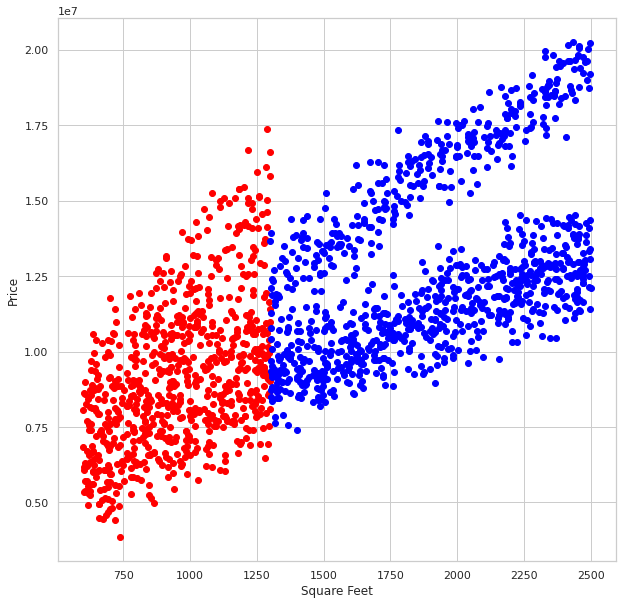

In [ ]:
scatter_plot(df8, "Adyar","KK Nagar")

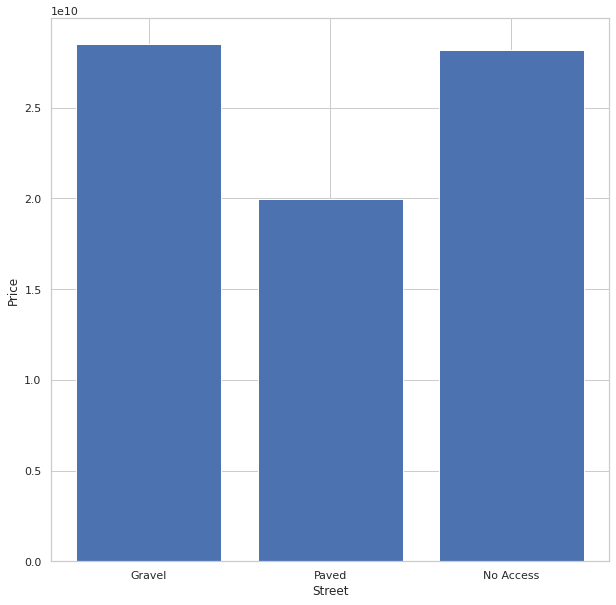

In [ ]:
street_price = df8.groupby("STREET")["SALES_PRICE"].sum()

plt.figure(figsize=(10,10))

plt.bar(df8['STREET'].unique(),street_price)
plt.xlabel("Street")
plt.ylabel("Price")
plt.show()

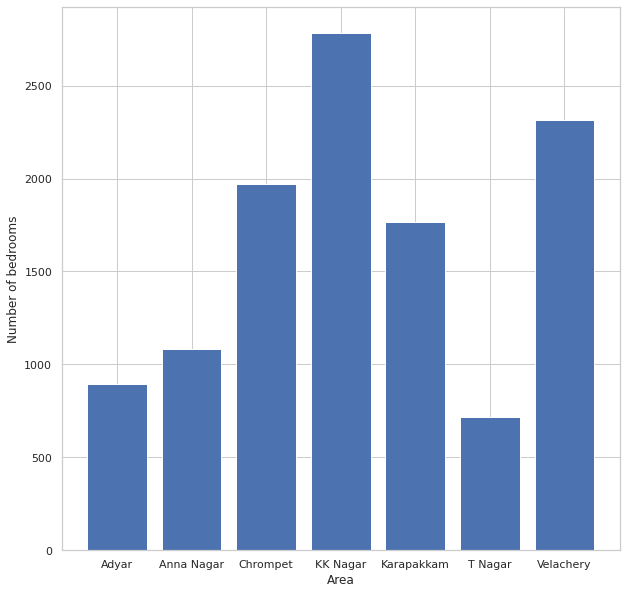

In [ ]:
bedroom = df8.groupby("AREA")["N_BEDROOM"].sum()

plt.figure(figsize=(10,10))

plt.bar(df8['AREA'].unique(),bedroom)
plt.xlabel("Area")
plt.ylabel("Number of bedrooms")
plt.show()

We drop the price per sqft column since it was used only for data visualization and data cleaning process and is not required for prediction.

In [ ]:
#Dropping price per sqft column

df9 = df8.drop('price_per_sqft', axis=1)

In [ ]:
df9.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_YEARS
0,Adyar,909,70,1,1,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200,19
1,Adyar,1056,83,1,1,Partial,Yes,Others,NoSewr,Paved,RH,2.2,3.4,3.7,3.19,319141,37546,9386490,25
2,Adyar,1136,69,1,1,Normal Sale,Yes,Others,AllPub,Paved,A,4.6,2.6,2.9,3.35,323214,49725,8287550,30
3,Adyar,1130,29,1,1,Family,Yes,Commercial,ELO,Paved,RH,2.3,2.5,2.2,2.29,468417,53533,13383350,29
4,Adyar,730,185,1,1,AdjLand,Yes,House,ELO,Gravel,RL,2.7,4.6,4.9,4.18,265449,53090,8848285,38


In [ ]:
#Shape of newly cleaned data
df9.shape

(7043, 19)

The newly cleaned data is having 7,043 rows and 19 columns

We can now head for building the ML Model.

# MODEL BUILDING

Since there are catergorical features, we need to convert them to numeric data. 

For that we use OneHot Encoding.

In [ ]:
#Applying OneHot encoding using dummies

df10 = pd.get_dummies(df9)

In [ ]:
#Dummy variables are created

df10.head(10)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,909,70,1,1,4.1,3.8,2.2,3.09,421094,92114,...,0,1,0,0,0,0,0,0,1,0
1,1056,83,1,1,2.2,3.4,3.7,3.19,319141,37546,...,1,0,0,1,0,0,0,1,0,0
2,1136,69,1,1,4.6,2.6,2.9,3.35,323214,49725,...,0,0,0,1,1,0,0,0,0,0
3,1130,29,1,1,2.3,2.5,2.2,2.29,468417,53533,...,0,0,0,1,0,0,0,1,0,0
4,730,185,1,1,2.7,4.6,4.9,4.18,265449,53090,...,0,1,0,0,0,0,0,0,1,0
5,868,15,1,1,2.3,2.1,2.0,2.11,325514,72336,...,0,1,0,0,0,0,0,0,1,0
6,904,52,1,1,3.8,3.2,2.6,3.08,348042,23203,...,0,0,1,0,0,0,0,0,0,1
7,779,51,1,1,3.6,4.4,2.4,3.16,190463,31744,...,1,0,1,0,0,1,0,0,0,0
8,718,75,1,1,2.0,3.9,3.4,3.08,211662,55701,...,0,0,1,0,0,1,0,0,0,0
9,916,32,1,1,3.6,3.0,3.9,3.63,228053,23390,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
#After encoding, we are having 42 columns

df10.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE_YEARS', 'AREA_Adyar', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'SALE_COND_AbNormal', 'SALE_COND_AdjLand',
       'SALE_COND_Family', 'SALE_COND_Normal Sale', 'SALE_COND_Partial',
       'PARK_FACIL_No', 'PARK_FACIL_Yes', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_AllPub',
       'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa', 'UTILITY_AVAIL_NoSewr ',
       'STREET_Gravel', 'STREET_No Access', 'STREET_Paved', 'MZZONE_A',
       'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

In [ ]:
df10['N_BATHROOM'].unique()

array([1, 2])

In [ ]:
#Splitting data into X & y 

X = df10.drop('SALES_PRICE', axis=1)
y = df10['SALES_PRICE']

In [ ]:
#Displaying X 

X.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,909,70,1,1,4.1,3.8,2.2,3.09,421094,92114,...,0,1,0,0,0,0,0,0,1,0
1,1056,83,1,1,2.2,3.4,3.7,3.19,319141,37546,...,1,0,0,1,0,0,0,1,0,0
2,1136,69,1,1,4.6,2.6,2.9,3.35,323214,49725,...,0,0,0,1,1,0,0,0,0,0
3,1130,29,1,1,2.3,2.5,2.2,2.29,468417,53533,...,0,0,0,1,0,0,0,1,0,0
4,730,185,1,1,2.7,4.6,4.9,4.18,265449,53090,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
#Displaying y

y.head()

0    13159200
1     9386490
2     8287550
3    13383350
4     8848285
Name: SALES_PRICE, dtype: int64

In [ ]:
#Splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#Displaying shapes of training and testing data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5282, 41)
(1761, 41)
(5282,)
(1761,)


# Linear Regression Model

In [ ]:
#Fitting into Linear Regression model

lr = LinearRegression()
lr.fit(X_train,y_train)
score1 = lr.score(X_test,y_test)
print("Score for LR model is:", score1)

Score for LR model is: 0.9662511020772799


In [ ]:
#Cross Validation for LR model

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cross1 = cross_val_score(lr, X, y, cv=cv)
print("Scores for LR model with 5 splits:", cross1)
print("Mean score for LR model:", cross1.mean())

Scores for LR model with 5 splits: [0.9662511  0.96730068 0.96678512 0.96663012 0.96760702]
Mean score for LR model: 0.9669148071188752


# Decision Tree Regressor Model

In [ ]:
#Fitting into DT model

dt = DecisionTreeRegressor(splitter='random')
dt.fit(X_train,y_train)
score2 = dt.score(X_test,y_test)
print("Score for DT model is:", score2)

Score for DT model is: 0.9568964634116837


In [ ]:
#Cross Validation for DT model

cv2 = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
cross2 = cross_val_score(dt, X, y, cv=cv2)
print("Scores for DT model with 5 splits:", cross2)
print("Mean score for DT model:", cross2.mean())

Scores for DT model with 5 splits: [0.95436408 0.9485858  0.94428025 0.9628032  0.95851457]
Mean score for DT model: 0.9537095800437259


# Grid Search Cross Validation

I have created a dictionary which has all the algorithms with their respective parameters

In [ ]:
#Creating a dictionary with algorithms and their respective parameters

algorithms = {
    "Linear Regression": {
        "model": lr,
        "params": {
            'fit_intercept': [True,False],
            'normalize': [True,False]
        }
    },

    "Lasso": {
        "model": Lasso(),
        "params": {
            'alpha': [1,2,3],
            'selection': ['random','cyclic']
    }
  },  

    "Ridge": {
        "model": Ridge(),
        "params": {
            'alpha': [1,2,3],
            'solver' : ['auto','svd', 'lsqr']
        }
    },

    "Decision Tree Regressor": {
        "model" : dt,
        "params": {
            'criterion': ['squared_error','absolute_error'],
            'splitter': ['best','random']
        }

    }

}

In [ ]:
#Finding the best score and best parameters for each algorithm

l = []
CV = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

for i,j in algorithms.items():
  g = GridSearchCV(j['model'], j['params'], cv=CV)
  g.fit(X,y)

  l.append({
      'Model':i,
      'Score':g.best_score_,
      'Parameters':g.best_params_
  })

final = pd.DataFrame(l,columns=['Model','Score','Parameters'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [ ]:
#Displaying best scores and parameters for each algorithm after GridSeach CV
final

,Model,Score,Parameters
0,Linear Regression,0.966915,"{'fit_intercept': False, 'normalize': True}"
1,Lasso,0.966915,"{'alpha': 3, 'selection': 'random'}"
2,Ridge,0.966919,"{'alpha': 2, 'solver': 'svd'}"
3,Decision Tree Regressor,0.954422,"{'criterion': 'squared_error', 'splitter': 'ra..."


Compared to other algorithms, LR is giving the best score (0.9669) and therefore we can use that for prediction

# MODEL PREDICTION

In [ ]:
X.columns[35:40]

Index(['MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL'], dtype='object')

In [ ]:
#Function to predict the prices based on the input

def price_predict(area,sale,parking,buildtype,utility,street,mzzone,sqft,dist,bedroom,bathroom,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,regfee,comm,age):
  area_index = np.where(X.columns == area)[0][0]
  sale_index = np.where(X.columns == sale)[0][0]
  park_index = np.where(X.columns == parking)[0][0]
  buildtype_index = np.where(X.columns == buildtype)[0][0]
  utility_index = np.where(X.columns == utility)[0][0]
  street_index = np.where(X.columns == street)[0][0]
  mzzone_index = np.where(X.columns == mzzone)[0][0]

  m = np.zeros(len(X.columns))
  m[0] = sqft
  m[1] = dist
  m[2] = bedroom
  m[3] = bathroom
  m[4] = qs_rooms
  m[5] = qs_bathroom
  m[6] = qs_bedroom
  m[7] = qs_overall
  m[8] = regfee
  m[9] = comm
  m[10] = age
  m[area_index] = 1
  m[sale_index] = 1
  m[park_index] = 1
  m[buildtype_index] = 1
  m[utility_index] = 1
  m[street_index] = 1
  m[mzzone_index] = 1

  return lr.predict([m])[0]

In [ ]:
#Sample prediction for Anna Nagar area

out = price_predict('AREA_Anna Nagar','SALE_COND_AbNormal','PARK_FACIL_Yes','BUILDTYPE_House','UTILITY_AVAIL_NoSeWa','STREET_Paved','MZZONE_C',1550,300,2,1,4.6,2.5,3.1,4.5,42000,80000,4)
print("Rs",round(out,2))

Rs 10235172.48


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

In [ ]:
#Exporting model as a pickle file

import pickle

with open("house_price_prediction.pickle","wb") as f:
  pickle.dump(lr,f)

In [ ]:
#Exporting only columns as a json file

import json

columns = {
    'Columns': [i.lower() for i in X.columns]
}

with open("columns.json","w") as f:
  f.write(json.dumps(columns))